In [82]:
# Data processing  
# -----------------------------------------------------------------------  
import pandas as pd  
import numpy as np

# Pandas options  
# -----------------------------------------------------------------------  
pd.options.display.max_colwidth = None

# Path configuration for custom module imports  
# -----------------------------------------------------------------------  
import sys  
sys.path.append('../')  # Adds the parent directory to the path for custom module imports  

# Visualizaciones
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

# Para realizar la clasificación y la evaluación del modelo
# -----------------------------------------------------------------------
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, roc_auc_score, confusion_matrix, roc_curve

from src.support_class_models import AnalisisModelosClasificacion

In [111]:
def calcular_metricas(y_train, pred_train, y_test, pred_test, train_prob = None, test_prob = None):
    """
    Calcula métricas de rendimiento para el modelo seleccionado.
    """

    # Métricas
    metricas_train = {
        "accuracy": accuracy_score(y_train, pred_train),
        "precision": precision_score(y_train, pred_train, average='weighted', zero_division=0),
        "recall": recall_score(y_train, pred_train, average='weighted', zero_division=0),
        "f1": f1_score(y_train, pred_train, average='weighted', zero_division=0),
        "kappa": cohen_kappa_score(y_train, pred_train),
        "auc": roc_auc_score(y_train, train_prob) if train_prob is not None else None
    }

    metricas_test = {
        "accuracy": accuracy_score(y_test, pred_test),
        "precision": precision_score(y_test, pred_test, average='weighted', zero_division=0),
        "recall": recall_score(y_test, pred_test, average='weighted', zero_division=0),
        "f1": f1_score(y_test, pred_test, average='weighted', zero_division=0),
        "kappa": cohen_kappa_score(y_test, pred_test),
        "auc": roc_auc_score(y_test, test_prob) if test_prob is not None else None
    }

    return pd.DataFrame({"train": metricas_train, "test": metricas_test})


In [84]:
df = pd.read_csv('../data/output/financial_data_preprocessed.csv', index_col=0)

In [85]:
df.head()

,is_fraudulent,customer_id,merchant_id,amount,location,purchase_category,customer_age,card_type_American Express,card_type_Discover,card_type_MasterCard,card_type_Visa
0,0,0.779808,0.510079,0.575423,0.389453,0.900628,0.480769,0.0,0.0,1.0,0.0
1,1,0.791454,0.584829,0.189301,0.578321,0.143774,0.826923,0.0,0.0,0.0,1.0
2,1,0.948651,0.463460,0.123960,1.000000,0.900628,0.750000,0.0,0.0,1.0,0.0
3,1,0.791454,0.541243,0.761671,1.000000,0.512530,0.788462,0.0,1.0,0.0,0.0
4,1,0.518519,0.533525,0.188153,0.389453,0.678115,0.346154,0.0,0.0,1.0,0.0


### Nota importante

En este caso en particular los `1` son `sí` y los `0` son `no`.

In [86]:
X = df.drop(columns='is_fraudulent')
y = df['is_fraudulent']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42, shuffle=True)

model_lr = LogisticRegression()

model_lr.fit(X_train, y_train)

LogisticRegression()

In [87]:
y_pred_test = model_lr.predict(X_test)
y_pred_train = model_lr.predict(X_train)

y_pred_test_prob = model_lr.predict_proba(X_test)

In [88]:
# Recordar hacer el reset_index para que pd.concat lo una bien
df_pred = pd.concat([y_test.reset_index(drop=True), pd.Series(y_pred_test).reset_index(drop=True)], axis=1)
# Renombramos las columnas
df_pred.columns = ['Real', 'Predicho']

In [89]:
df_pred[df_pred['Real'] != df_pred['Predicho']].shape[0]

1316

In [90]:
df_pred[df_pred['Real'] == df_pred['Predicho']].shape[0]

1684

### Matriz de confusión

In [91]:
matriz_conf = confusion_matrix(y_test, y_pred_test)

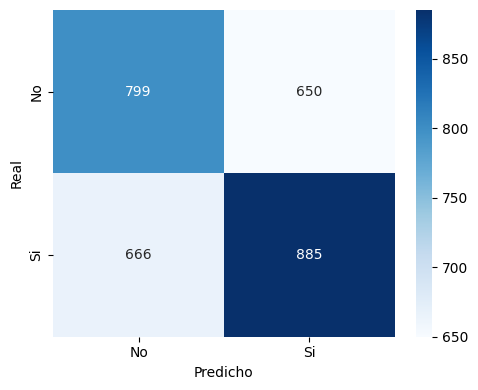

In [92]:
plt.figure(figsize=(5,4))
etiquetas = ['No', 'Si']

sns.heatmap(matriz_conf, 
            annot=True,
            fmt = "d",
            xticklabels=etiquetas,
            yticklabels=etiquetas,
            cmap='Blues')

plt.xlabel('Predicho')
plt.ylabel('Real')
plt.tight_layout()

In [93]:
# Ratio de falsos negativos, verdaderos positivos y umbrales
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test_prob[:,1])

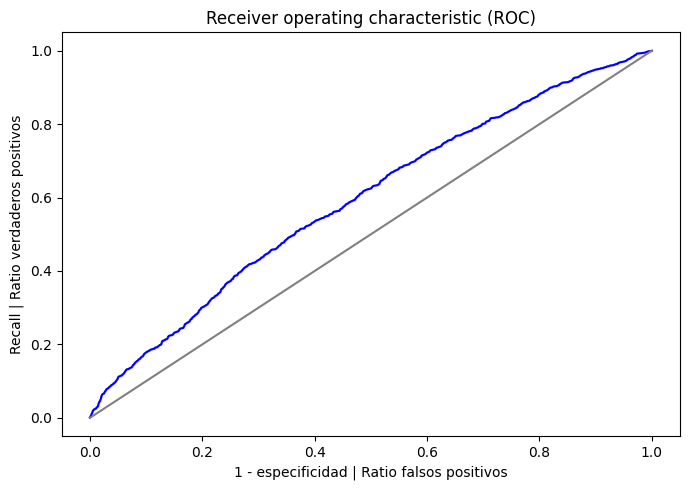

In [94]:
plt.figure(figsize=(7,5))

sns.lineplot(x=fpr, y=tpr, color='blue')
sns.lineplot(x=[0, 1], y = [0, 1], color = 'grey')

plt.xlabel("1 - especificidad | Ratio falsos positivos")
plt.ylabel("Recall | Ratio verdaderos positivos")
plt.title("Receiver operating characteristic (ROC)")
plt.tight_layout()

In [112]:
calcular_metricas(y_train, y_pred_train, y_test, y_pred_test).round(4)

,train,test
accuracy,0.5573,0.5613
precision,0.5573,0.5615
recall,0.5573,0.5613
f1,0.5573,0.5614
kappa,0.1145,0.1220
auc,NaN,NaN


In [96]:
# instanciamos la clase de regresión logistica
logistica = AnalisisModelosClasificacion(dataframe = df, variable_dependiente = "is_fraudulent")

In [97]:
# llamamos a la función para ajustar el modelo
logistica.ajustar_modelo("logistic_regression")

/opt/homebrew/Caskroom/miniconda/base/envs/proyecto7/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/proyecto7/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/proyecto7/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/proyecto7/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/proyecto7/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarni

In [98]:
# llamamos al metodo para obtener los resultaods de las predicciones
df_resultados = logistica.calcular_metricas(modelo_nombre =  "logistic_regression" )
df_resultados.head()

,train,test
accuracy,0.561250,0.567500
precision,0.561194,0.567129
recall,0.561250,0.567500
f1,0.561060,0.567195
kappa,0.122183,0.133143


/Users/javi/Documents/Hackio/Proyectos/Project-ML-FraudulentTransactionDetection/notebook/../src/support_class_models.py:213: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=importancia_df, palette="viridis")


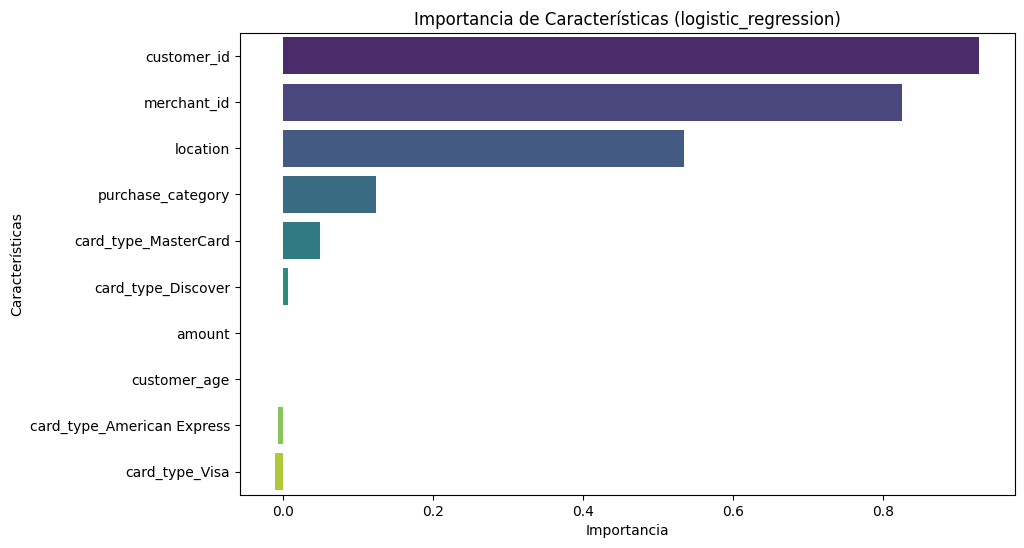

In [99]:
# Mostramos la importancia de los predictores en el modelo regresión logística
logistica.importancia_predictores(modelo_nombre ='logistic_regression')

Grids

In [ ]:
logistic_params =  [
    {'penalty': ['l1'], 'solver': ['saga'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'max_iter': [10000]},
    {'penalty': ['l2'], 'solver': ['liblinear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'max_iter': [10000]},
    {'penalty': ['elasticnet'], 'solver': ['saga'], 'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'max_iter': [10000]},
    {'penalty': ['none'], 'solver': ['lbfgs'], 'max_iter': [10000]}]

gridsearch = GridSearchCV(LogisticRegression(), param_grid=logistic_params, cv = 5, scoring = "f1")

gridsearch.fit(X_train, y_train)

/opt/homebrew/Caskroom/miniconda/base/envs/proyecto7/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
5 fits failed out of a total of 215.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniconda/base/envs/proyecto7/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/homebrew/Caskroom/miniconda/base/envs/proyecto7/lib/python3.12/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/opt/homebrew/Caskroom/miniconda/base/envs/proyecto7/lib/pytho

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 10, 100],
                          'max_iter': [10000], 'penalty': ['l1'],
                          'solver': ['saga']},
                         {'C': [0.001, 0.01, 0.1, 1, 10, 100],
                          'max_iter': [10000], 'penalty': ['l2'],
                          'solver': ['liblinear']},
                         {'C': [0.001, 0.01, 0.1, 1, 10, 100],
                          'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9],
                          'max_iter': [10000], 'penalty': ['elasticnet'],
                          'solver': ['saga']},
                         {'max_iter': [10000], 'penalty': ['none'],
                          'solver': ['lbfgs']}],
             scoring='f1')

In [101]:
best_model = gridsearch.best_estimator_

In [102]:
y_train_predict = best_model.predict(X = X_train)
y_test_predict = best_model.predict(X = X_test)

y_train_predict_prob = best_model.predict_proba(X = X_train)[:, 1]
y_test_predict_prob = best_model.predict_proba(X = X_test)[:, 1]

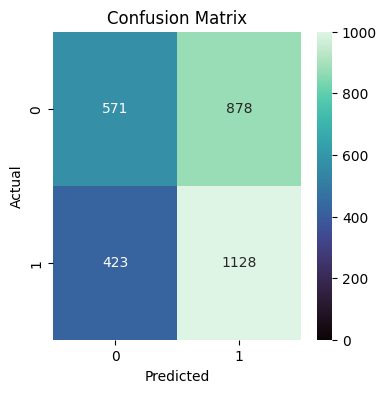

In [103]:
matriz_conf = confusion_matrix(y_test, y_test_predict)

plt.figure(figsize = (4,4))
sns.heatmap(matriz_conf, annot=True, fmt="d", vmin=0, vmax=1000, cmap="mako")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [117]:
metricas_regresion = calcular_metricas(y_train, y_train_predict, y_test, y_test_predict, y_train_predict_prob, y_test_predict_prob)
metricas_regresion

,train,test
accuracy,0.550429,0.566333
precision,0.556052,0.568174
recall,0.550429,0.566333
f1,0.536948,0.553686
kappa,0.099365,0.122604
auc,0.578960,0.584279


In [114]:
fpr, tpr, thresholds =  roc_curve(y_test, y_test_predict_prob)

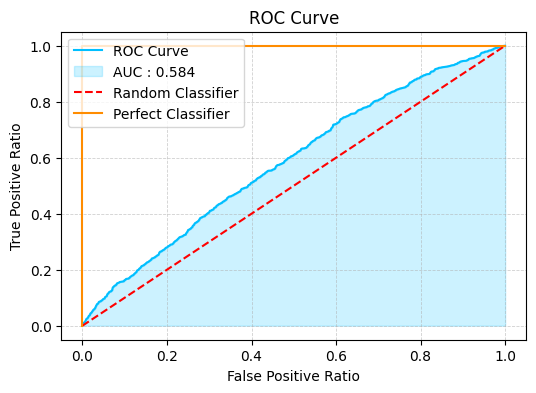

In [127]:
plt.figure(figsize=(6,4))

sns.lineplot(x = fpr, y = tpr, color = "deepskyblue", label = "ROC Curve")

plt.fill_between(fpr, tpr, color = "deepskyblue", alpha = 0.2, interpolate=False, label = f'AUC : {metricas_regresion['test']["auc"]:.3f}')
plt.plot([0,1],[0,1], color = "red", ls = "--", label = "Random Classifier")
plt.plot([0,0,1], [0,1,1], color = "darkorange", lw = 1.5, label = "Perfect Classifier")

plt.xlabel("False Positive Ratio")
plt.ylabel("True Positive Ratio")
plt.grid(ls = "--", lw = 0.6, alpha = 0.6)
plt.title("ROC Curve")
plt.legend()
plt.show()